In [3]:
#Libraries - all required except plt (just for checking and visualization) and mp (for viewing final model)
import matplotlib.pyplot as plt
import numpy as np
import triangle as tr
import meshio
import meshplot as mp
import json
import subprocess
import colorsys
import xml.etree.ElementTree as ET
from scipy.special import comb
import sys
import math

In [4]:
def bernstein_poly(i, n, t):
    """
     The Bernstein polynomial of n, i as a function of t
    """

    return comb(n, i) * ( t**(n-i) ) * (1 - t)**i


def bezier_curve(points, nTimes=1000):
    """
       Given a set of control points, return the
       bezier curve defined by the control points.

       points should be a list of lists, or list of tuples
       such as [ [1,1], 
                 [2,3], 
                 [4,5], ..[Xn, Yn] ]
        nTimes is the number of time steps, defaults to 1000

        See http://processingjs.nihongoresources.com/bezierinfo/
    """

    nPoints = len(points)
    xPoints = np.array([p[0] for p in points])
    yPoints = np.array([p[1] for p in points])

    t = np.linspace(0.0, 1.0, nTimes)

    polynomial_array = np.array([bernstein_poly(i, nPoints-1, t) for i in range(0, nPoints)])

    xvals = np.dot(xPoints, polynomial_array)
    yvals = np.dot(yPoints, polynomial_array)

    return xvals, yvals, t

In [5]:
tree = ET.parse('xmls/snake/lady_bug.xml')
curve_set_file = tree.getroot()
curve_points = []
curve_cols_left = []
curve_cols_right = []
for i in range(len(curve_set_file)):
    curve_points.append([])
    curve_cols_left.append([])
    curve_cols_right.append([])
    cur_curve = curve_set_file[i]
    for control_point in cur_curve[0]:
        pt_x = float(control_point.attrib['y'])
        pt_y = float(control_point.attrib['x']) * -1
        curve_points[i].append([pt_x, pt_y])
    for left_col in cur_curve[1]:
        r = float(left_col.attrib['B'])
        g = float(left_col.attrib['G'])
        b = float(left_col.attrib['R'])
        pos = float(left_col.attrib['globalID'])
        curve_cols_left[i].append([r, g, b, pos])
    for right_col in cur_curve[2]:
        r = float(left_col.attrib['B'])
        g = float(left_col.attrib['G'])
        b = float(left_col.attrib['R'])
        pos = float(left_col.attrib['globalID'])
        curve_cols_right[i].append([r, g, b, pos])

[0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5        0.53333333 0.56666667
 0.6        0.63333333 0.66666667 0.7        0.73333333 0.76666667
 0.8        0.83333333 0.86666667 0.9        0.93333333 0.96666667
 1.        ]
[0.         0.06666667 0.13333333 0.2        0.26666667 0.33333333
 0.4        0.46666667 0.53333333 0.6        0.66666667 0.73333333
 0.8        0.86666667 0.93333333 1.        ]
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.08333333 0.16666667 0.25       0.33333333 0.41666667
 0.5        0.58333333 0.66666667 0.75       0.83333333 0.91666667
 1.        ]
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]
[0.         0.16666

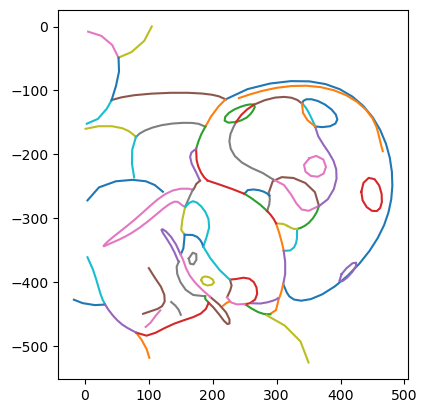

In [6]:
pts_list = []
for i in range(len(curve_points)):
    curve = curve_points[i]
    (x,y,t) = bezier_curve(curve, len(curve))
    print(t)
    for p in range(len(x)):
        pts_list.append([x[p], y[p]])
    plt.plot(x,y)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

In [9]:
len(curve_points)

71

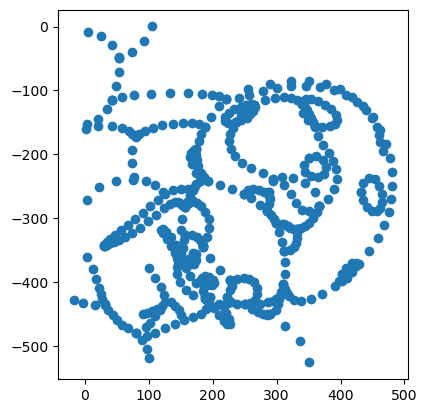

In [5]:
plt.scatter([x for x,y in pts_list], [y for x,y in pts_list])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

In [71]:
def make_cols_match(cols, pts):
    new_cols = []
    for s in range(len(pts)):
        if len(pts[s]) > len(cols[s]):
            rs = []
            for c in range(len(cols[s])):
                rs.append((len(pts[s]) - 1) * (c/(len(cols[s]) - 1)))
            new_cols.append([])
            for i in range(len(pts[s])):
                new_cols[s].append(None)
            for c in range(len(cols[s])):
                new_cols[s][int(rs[c])] = cols[s][c]
            where_none = []
            for c in range(len(new_cols[s])):
                if new_cols[s][c] == None:
                    where_none.append(c)
            return([where_none, rs, new_cols])

In [77]:
cols = [[]]
for i in range(10):
    cols[0].append([0, 0, 0])
pts = [[]]
for i in range(60):
    pts[0].append([0, 0])
b = make_cols_match(cols, pts)
b

[[1,
  2,
  3,
  4,
  5,
  7,
  8,
  9,
  10,
  11,
  12,
  14,
  15,
  16,
  17,
  18,
  20,
  21,
  22,
  23,
  24,
  25,
  27,
  28,
  29,
  30,
  31,
  33,
  34,
  35,
  36,
  37,
  38,
  40,
  41,
  42,
  43,
  44,
  46,
  47,
  48,
  49,
  50,
  51,
  53,
  54,
  55,
  56,
  57,
  58],
 [0.0,
  6.555555555555555,
  13.11111111111111,
  19.666666666666664,
  26.22222222222222,
  32.77777777777778,
  39.33333333333333,
  45.88888888888889,
  52.44444444444444,
  59.0],
 [[[0, 0, 0],
   None,
   None,
   None,
   None,
   None,
   [0, 0, 0],
   None,
   None,
   None,
   None,
   None,
   None,
   [0, 0, 0],
   None,
   None,
   None,
   None,
   None,
   [0, 0, 0],
   None,
   None,
   None,
   None,
   None,
   None,
   [0, 0, 0],
   None,
   None,
   None,
   None,
   None,
   [0, 0, 0],
   None,
   None,
   None,
   None,
   None,
   None,
   [0, 0, 0],
   None,
   None,
   None,
   None,
   None,
   [0, 0, 0],
   None,
   None,
   None,
   None,
   None,
   None,
   [0, 0, 0],


In [ ]:
#fuck :)
#Try and find a way of interpolating I guess? I'm tired dsfjsk